In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random


COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [2]:
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

def flip(p):
    return np.random.random() < p

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

nodes = range(3)
for edge in adjacent_edges(nodes, 1):
    print(edge)


(0, 1)
(1, 2)
(2, 0)


In [3]:
4%4

0

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


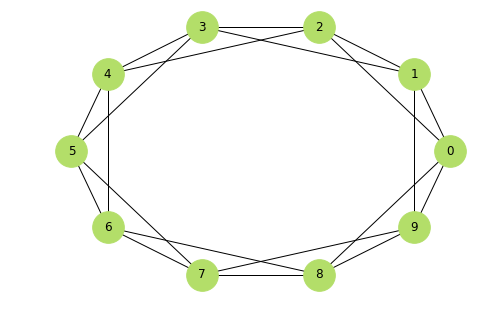

In [4]:
def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

lattice = make_ring_lattice(10, 4)
nx.draw_circular(lattice, node_color = COLORS[6], node_size=1000, with_labels=True)

def make_ws_graph(n, k, p):
    ws = make_ring_lattice(n, k)
    rewire(ws, p)
    return ws


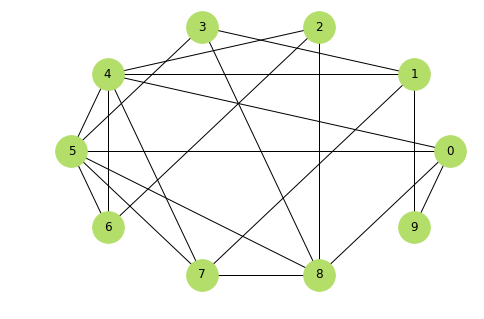

In [5]:
def rewire(G, p):
    nodes = set(G)
    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)

rewire(lattice, 1)
nx.draw_circular(lattice, node_color = COLORS[6], node_size=1000, with_labels=True)


In [6]:
'''
n = 10
k = 0
ns = 100

thinkplot.preplot(cols=3)
ws = make_ws_graph(n, k, 0)
nx.draw_circular(ws, node_size=ns)
'''

'\nn = 10\nk = 0\nns = 100\n\nthinkplot.preplot(cols=3)\nws = make_ws_graph(n, k, 0)\nnx.draw_circular(ws, node_size=ns)\n'

In [7]:
def node_clustering(G, u):
    neighbors = G[u]
    k = len(neighbors)
    if k < 2:
        return np.nan
    
    possible = k * (k-1) / 2
    exist = 0
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist += 1
    return exist / possible

lattice = make_ring_lattice(10, 4)
node_clustering(lattice, 1)

0.5

In [8]:
def clustering_coefficient(G):
    cu = [node_clustering(G, node) for node in G]
    return np.nanmean(cu)

clustering_coefficient(lattice)

0.5

1.0


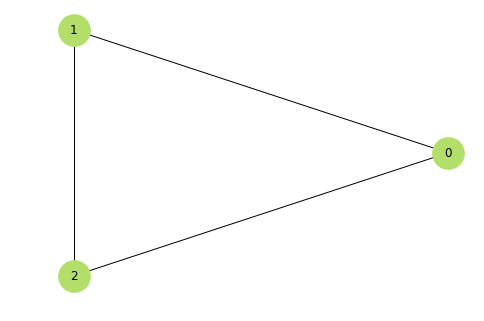

In [9]:
def path_lengths(G):
    length_map = nx.shortest_path_length(G)
    for source, dist_map in length_map:
        for dest, dist in dist_map.items():
            if not source == dest:
                yield dist

def characteristic_path_length(G):
    return np.mean(list(path_lengths(G)))

lattice = make_ring_lattice(3, 2)
print(characteristic_path_length(lattice))
nx.draw_circular(lattice, node_color = COLORS[6], node_size=1000, with_labels=True)

In [10]:
def run_one_graph(n, k, p):
    ws = make_ws_graph(n, k, p)
    mpl = characteristic_path_length(ws)
    cc = clustering_coefficient(ws)
    return mpl, cc

ps = np.logspace(-4, 0, 9)

def run_experiment(ps, n=1000, k=10, iters=20):
    res = []
    for p in ps:
        t = [run_one_graph(n, k, p) for _ in range(iters)]
        means = np.array(t).mean(axis=0)
        res.append(means)
    return np.array(res)

print(run_experiment(ps))

KeyboardInterrupt: 

In [11]:
from collections import deque

def reachable_nodes(G, start):
    seen  = set()
    #stack = [start]
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in seen:
            seen.add(node)
            queue.extend(G.neighbors(node))
    return seen

In [12]:
def shortest_path_dijkstra(G, source):
    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.popleft()
        new_dist = dist[node] + 1
        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        
        queue.extend(neighbors)
    return dist

In [13]:
lattice = make_ring_lattice(10, 4)

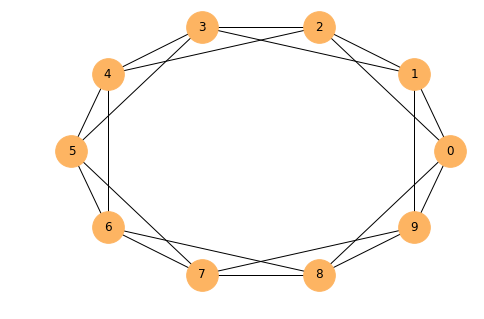

In [14]:
nx.draw_circular(lattice, with_labels=True, node_size=1000, node_color=COLORS[5])

In [15]:
d1 = shortest_path_dijkstra(lattice, 0)
d1

{0: 0, 8: 1, 1: 1, 2: 1, 9: 1, 6: 2, 7: 2, 3: 2, 4: 2, 5: 3}

In [16]:
d2 = nx.shortest_path_length(lattice, 0)
d2

{0: 0, 1: 1, 2: 1, 8: 1, 9: 1, 3: 2, 4: 2, 6: 2, 7: 2, 5: 3}

In [17]:
d2 == d1

True

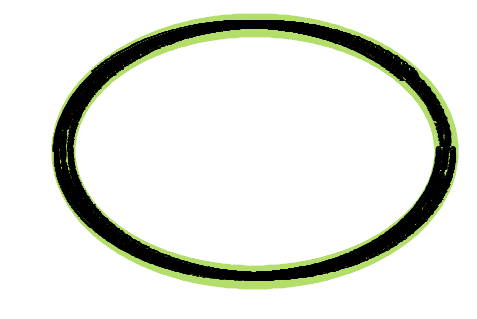

In [18]:
lattice2 = make_ring_lattice(1000, 10)
nx.draw_circular(lattice2, node_color=COLORS[6], node_size=500, with_labels=True)

In [19]:
d3 = shortest_path_dijkstra(lattice2, 0)
maxv = (0, 0)
for val in d3:
    if d3[val] >= maxv[1]: maxv = (val, d3[val])

maxv

(501, 100)

In [20]:
max(d1.items())

(9, 1)

# Exercise answers

Exercise 3.1


In [21]:
def available_nodes(d, k):
    nlist = list()
    for key in d:
        if d[key] < k:
            nlist.append(key)
    return nlist
                
def random_edges(nodes, n, k):
    ndict = {n:0 for n in nodes}
     
    while not ndict[min(ndict, key=ndict.get)] == k:
        n1 = min(ndict, key=ndict.get)
        alist = available_nodes(ndict, k)
        while ndict[n1] < k:
            random.shuffle(alist)
            n2 = alist.pop()
            if not n2 == n1:
                ndict[n1] += 1
                ndict[n2] += 1
                yield n1, n2
            
def make_regular_graph(n, k):
    G = nx.Graph()
    nodes = list(range(n))
    G.add_nodes_from(nodes)
    try:
        G.add_edges_from(random_edges(nodes, n, k))
    except IndexError:
        pass
    return G

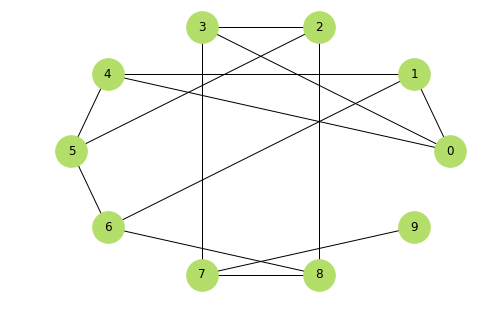

In [22]:
for x in range(1):
    regular = make_regular_graph(10, 3)
    nx.draw_circular(regular, node_color = COLORS[6], node_size=1000, with_labels=True)

In [23]:
def add_edges_to_G(G, k):
    for u in G.nodes:
        choices = list(G.nodes - {u} - set(G[u]))
        random.shuffle(choices)
        while len(G[u]) < k and choices:
            v = choices.pop()
            random.choice(list(G.nodes - {u} - set(G[u])))
            if len(G[v]) < k:
                G.add_edge(u, v)
                
    return G

def make_regular_graph_n(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G = add_edges_to_G(G, k)
    return G

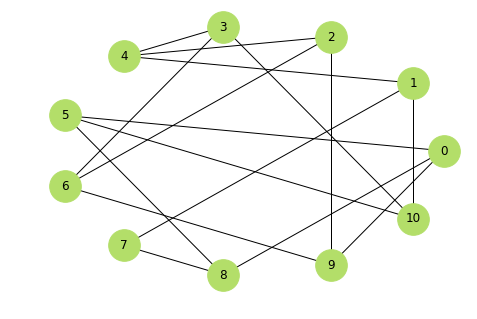

In [24]:
test = make_regular_graph_n(11, 3)
nx.draw_circular(test, node_color=COLORS[6], node_size=1000, with_labels=True)

Exercise 3.2

In [25]:
def reachable_nodes_bfs(G, start):
    seen = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in seen:
            seen.add(node)
            neighbors = set(G[node]) - seen
            queue.extend(neighbors)
    return seen

def plain_bfs(G, start):
    seen = set()
    nextlevel = {start}
    while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        for v in thislevel:
            if v not in seen:
                seen.add(v)
                nextlevel.update(G[v])
    return seen

def looper(met, arg1, arg2):
    for x in range(1000):
        met(arg1, arg2)

%time res = looper(reachable_nodes_bfs, regular, 0)
%time res = looper(plain_bfs, regular, 0)

Wall time: 18 ms
Wall time: 14 ms


In [26]:
def shortest_path_dijkstra(G, source):
    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.popleft()
        new_dist = dist[node] + 1

        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        
        queue.extend(neighbors)
    return dist

def shortest_path_plain(G, start):
    dist = dict()
    nextlevel = {start}
    new_dist = -1
    while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        new_dist += 1
        for v in thislevel:
            if v not in dist:
                dist[v] = new_dist
                nextlevel.update(G[v])
    return dist

In [27]:
%time res = shortest_path_plain(regular, 0)
%time res = shortest_path_dijkstra(regular, 0)


shortest_path_dijkstra(regular, 0) == shortest_path_plain(regular, 0)

Wall time: 997 µs
Wall time: 0 ns


True

Exercise 3.4

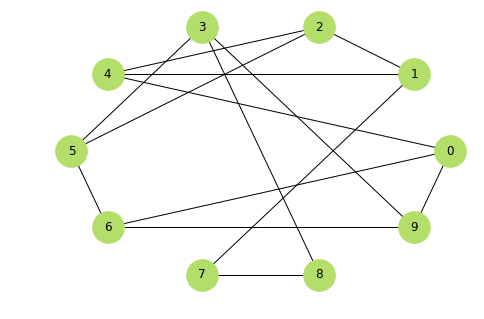

In [28]:
regular = make_regular_graph(10, 3)
nx.draw_circular(regular, node_color = COLORS[6], node_size=1000, with_labels=True)

In [29]:
def shortest_path_dfs(G, start):
    dist = {start:0}
    stack = [start]
    while stack:
        node = stack.pop()
        new_dist = dist[node] + 1
        
        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
            
        stack.extend(neighbors)
    return dist
            
            
    
def reachable_nodes(G, start):

    seen = set()
    stack = [start]
    while stack:
        print(stack)
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(set(G.neighbors(node)).difference(seen).difference(stack))
            print(stack, '\n')
    return seen

In [30]:
#print(reachable_nodes(regular, 0))
d = shortest_path_dfs(regular, 0)
p = shortest_path_plain(regular, 0)
print(p)

{0: 0, 9: 1, 4: 1, 6: 1, 1: 2, 2: 2, 3: 2, 5: 2, 7: 3, 8: 3}


Exercise 3.6

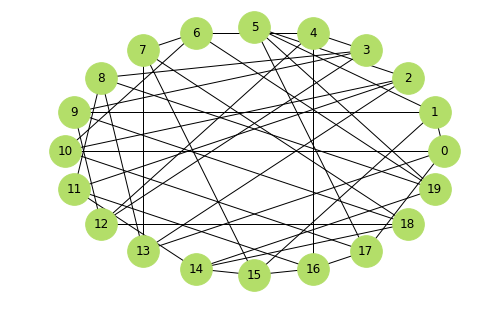

In [197]:
regular = make_regular_graph(20, 4)
nx.draw_circular(regular, node_color = COLORS[6], node_size=1000, with_labels=True)

In [198]:
import math
class initializeDict(dict):
    def __getitem__(self, item):
        try:
            return dict.__getitem__(self, item)
        except KeyError:
            value = self[item] = type(self)()
            return value

def FW_algo(G):
    nodes = G.nodes
    dist = initializeDict()   #initialize dictionary
    for n in nodes:  #set all values in dictionary to infinity
        for m in nodes:
            if m in G[n]:
                dist[n][m] = 1
            elif n==m:
                dist[n][m] = 0
            else:
                dist[n][m] = math.inf
    for k in nodes:
        for i in nodes:
            for j in nodes:
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    return dist

In [199]:
dist = FW_algo(regular)

In [202]:
dist[0][15]

2